200x200x200 0.18892105420430502 1.970903793970744
500x500x500 0.19825569788614902 1.4972899754842117
50x800x200 0.20785188674926702 2.253162542978916
1000x2x1000 0.10032804807027101 0.9438263575235927
10x50000x10 0.29277221361796 1.8026270866394005


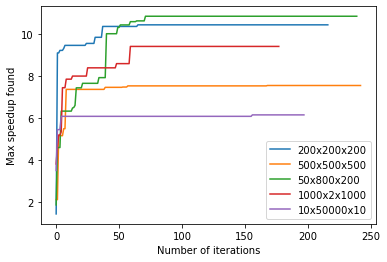

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_knob_vs_speedup(df, knob):
    data = df[[knob, "speedup"]]
    xs, ys = data.to_numpy().T
    fig, ax = plt.subplots()
    ax.scatter(xs, ys)
    return fig, ax

def plot_speedup_over_iter(df, speedup: bool = True, label=None, fig_ax=None):
    field = "speedup" if speedup else "time"
    data = df[["iter", field]].sort_values("iter")
    xs, ys = data.to_numpy().T
    fun = np.maximum.accumulate if speedup else np.minimum.accumulate
    ys = fun(ys)
    if fig_ax:
        fig, ax = fig_ax
    else:
        fig, ax = plt.subplots()
    ax.plot(xs, ys, label=label)
    ax.set_xlabel("Number of iterations")
    ax.set_ylabel("Max speedup found" if speedup else "Time (sec)")
    return fig, ax

def read_and_plot(folder, speedup, fig_ax=None):
    return 

def compare_plots(cases, speedup):
    fig_ax = None
    for label, prefix in cases.items():
        df = pd.read_json(f"{prefix}/configs.json")
        time = df.time.min()
        speedup = df.speedup.max()
        print(label, time, time * speedup)
        fig_ax = plot_speedup_over_iter(df, speedup, label, fig_ax)
    fig_ax[1].legend()
    return fig_ax

fig, ax = compare_plots({
    "200x200x200": "matmul/test_eigen",
    "500x500x500": "matmul/test_sqr2",
    "50x800x200": "matmul/test_rect1",
    "1000x2x1000": "matmul/test_rect2",
    "10x50000x10": "matmul/test_dot"}, True)
fig.savefig("compare.png", dpi=300)

joint 0.09878349304199201 0.807460467020669
separate_40 0.1171289285024 0.8333682219187367
separate_100 0.099829355875651 0.8191645145416256


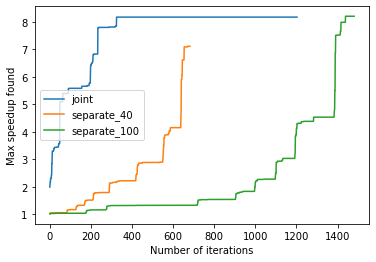

In [49]:
fig, ax = compare_plots({
    "joint": "small_composite/test_equal",
    "separate_40": "small_composite/test_parti_40",
    "separate_100": "small_composite/test_parti",
}, True)
fig.savefig("compare.png", dpi=300)